
# Train YOLOv8 Object Detection on a Custom Dataset

---


Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.




# New Section

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Jun  6 01:54:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
################ Mounting the Google Drive #################
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/yolo8-rail-road-crossing")

directory_path = "/content/drive/MyDrive/yolo8-rail-road-crossing"

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/yolo8-rail-road-crossing


In [ ]:
!pip install roboflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ls

## Install YOLOv8



In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="1y2suOpZcCBrV3qiK5SN")
project = rf.workspace("al-amin").project("rail-road-crossing")
dataset = project.version(4).download("yolov8")


/content/drive/MyDrive/yolo8-rail-road-crossing/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to rail-road-crossing-4 in yolov8:: 100%|██████████| 5382/5382 [00:31<00:00, 168.98it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=1024 plots=True

/content/drive/MyDrive/yolo8-rail-road-crossing
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/yolo8-rail-road-crossing/datasets/rail-road-crossing-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=1024, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml					    train_batch2205.jpg
confusion_matrix.png				    train_batch2206.jpg
events.out.tfevents.1686017002.4af9163e4f0b.3967.0  train_batch2207.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content/drive/MyDrive/yolo8-rail-road-crossing


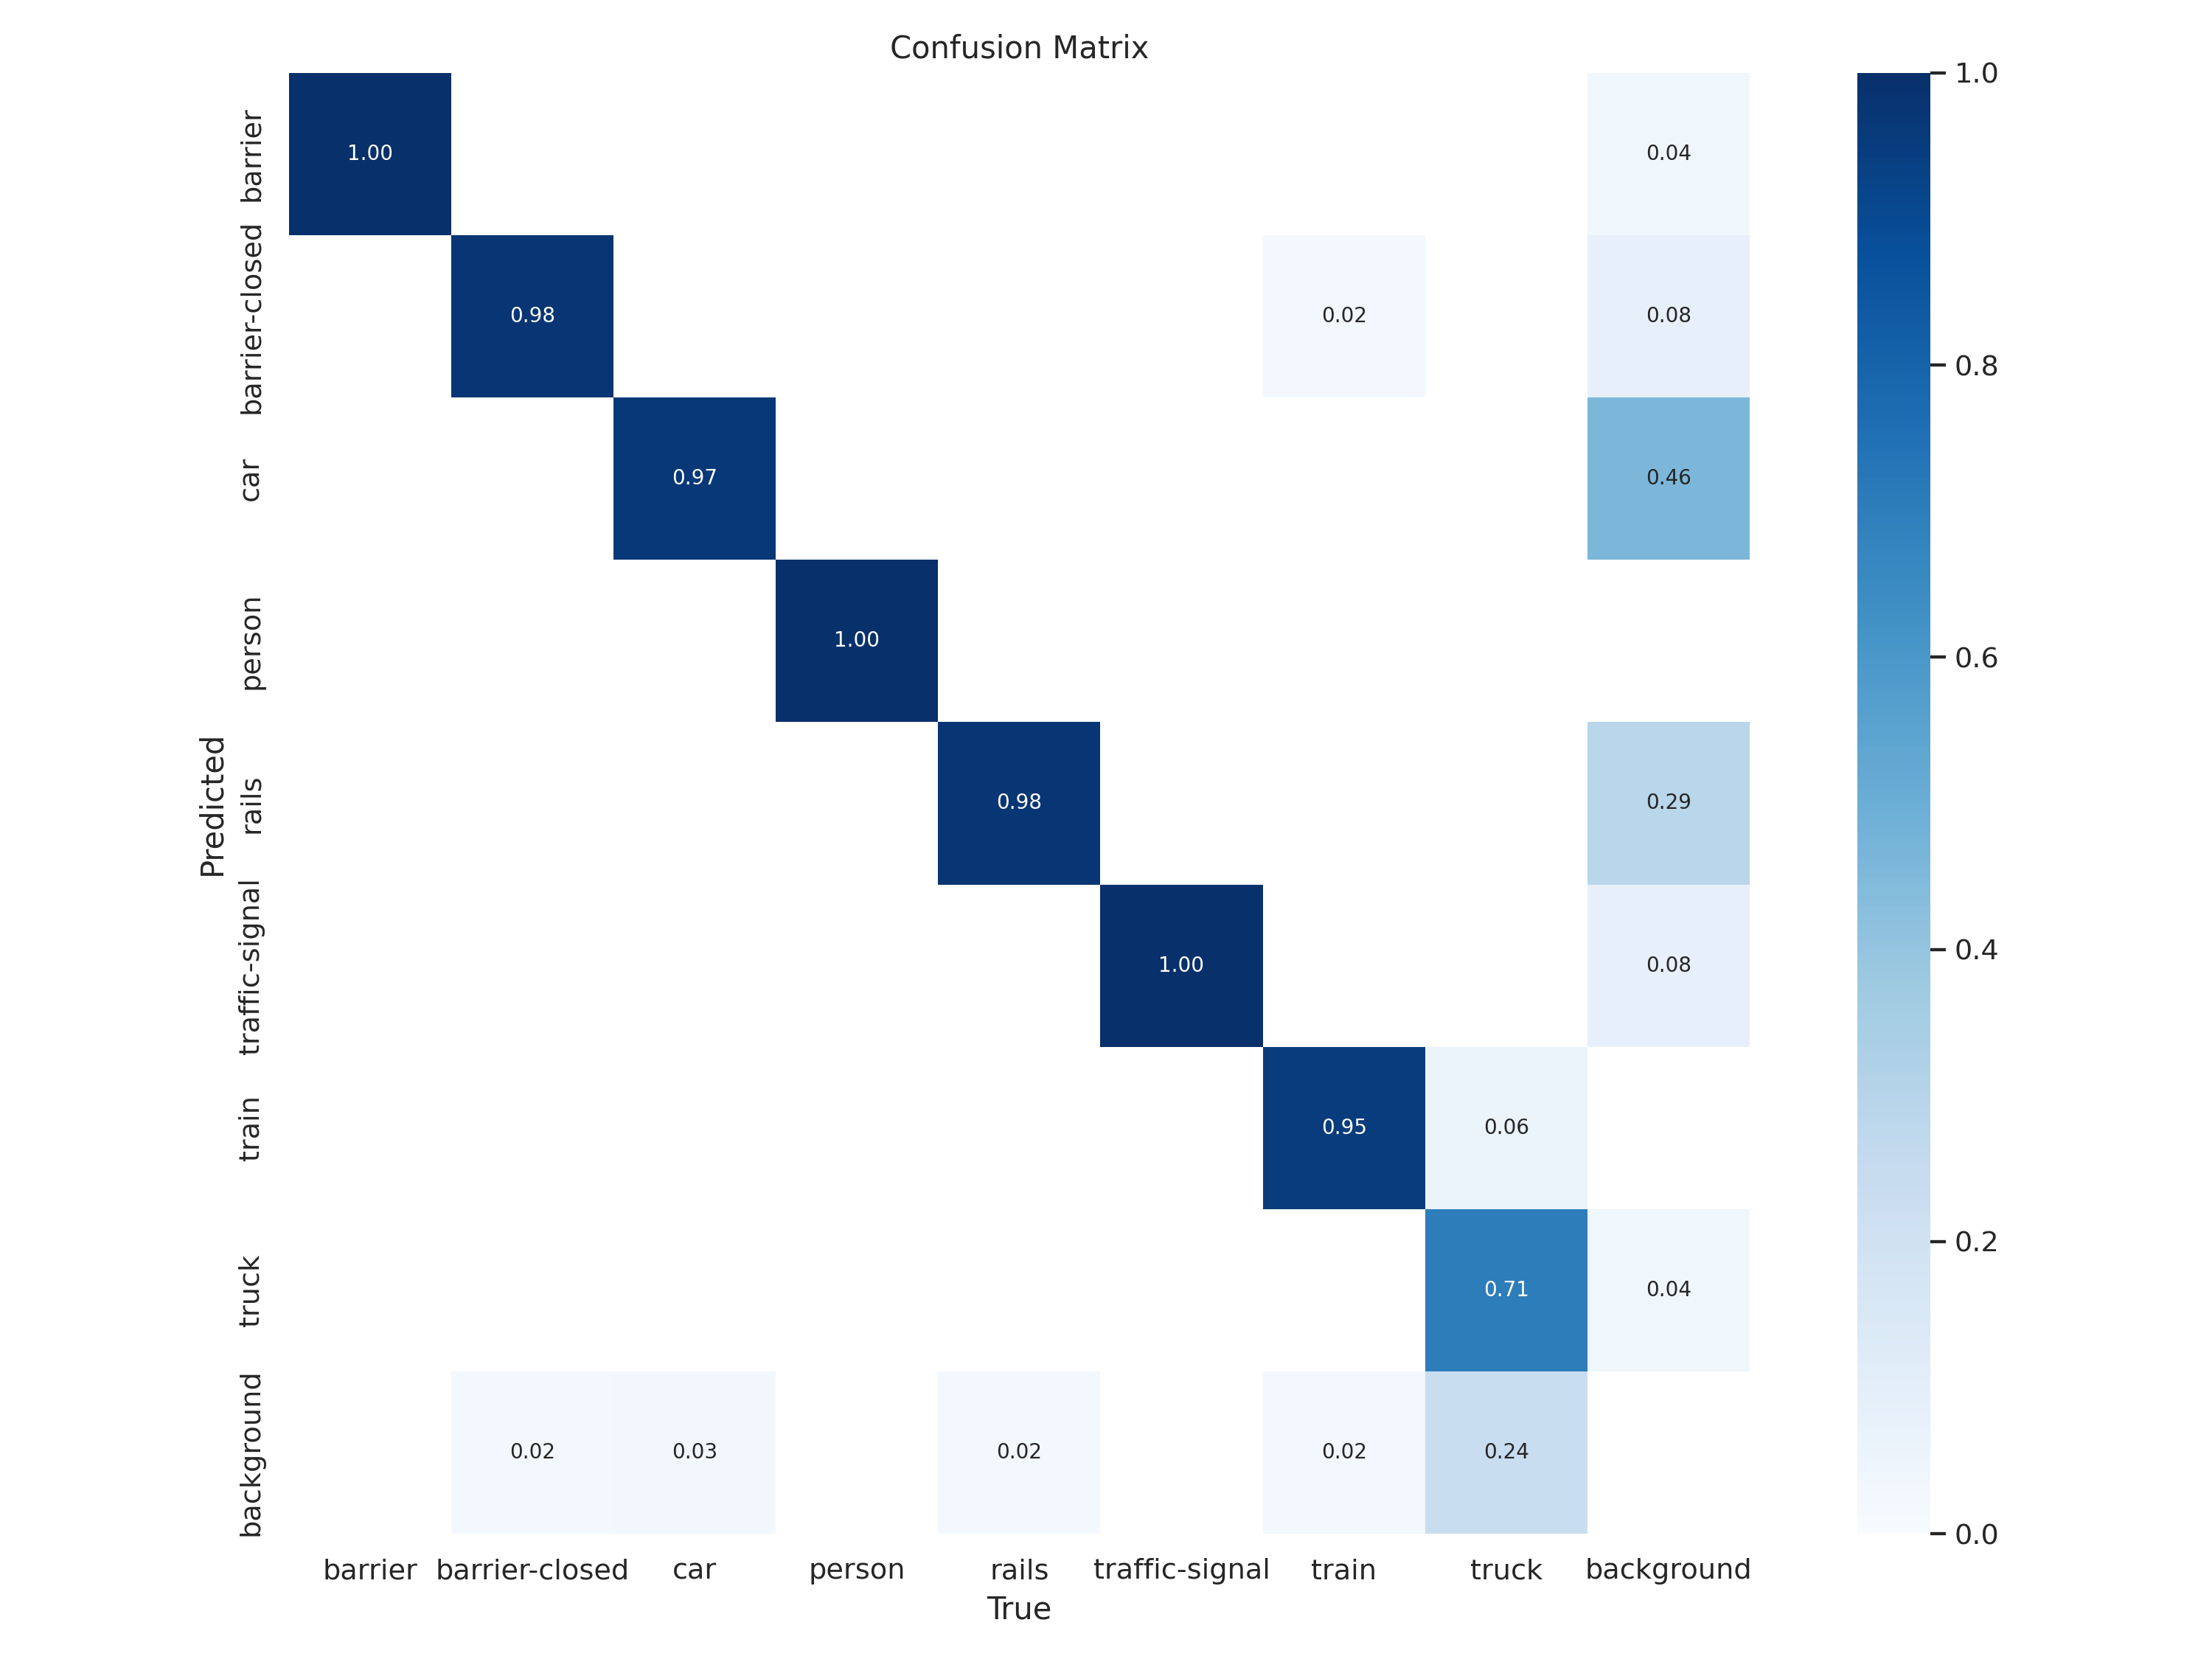

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=800)

/content/drive/MyDrive/yolo8-rail-road-crossing


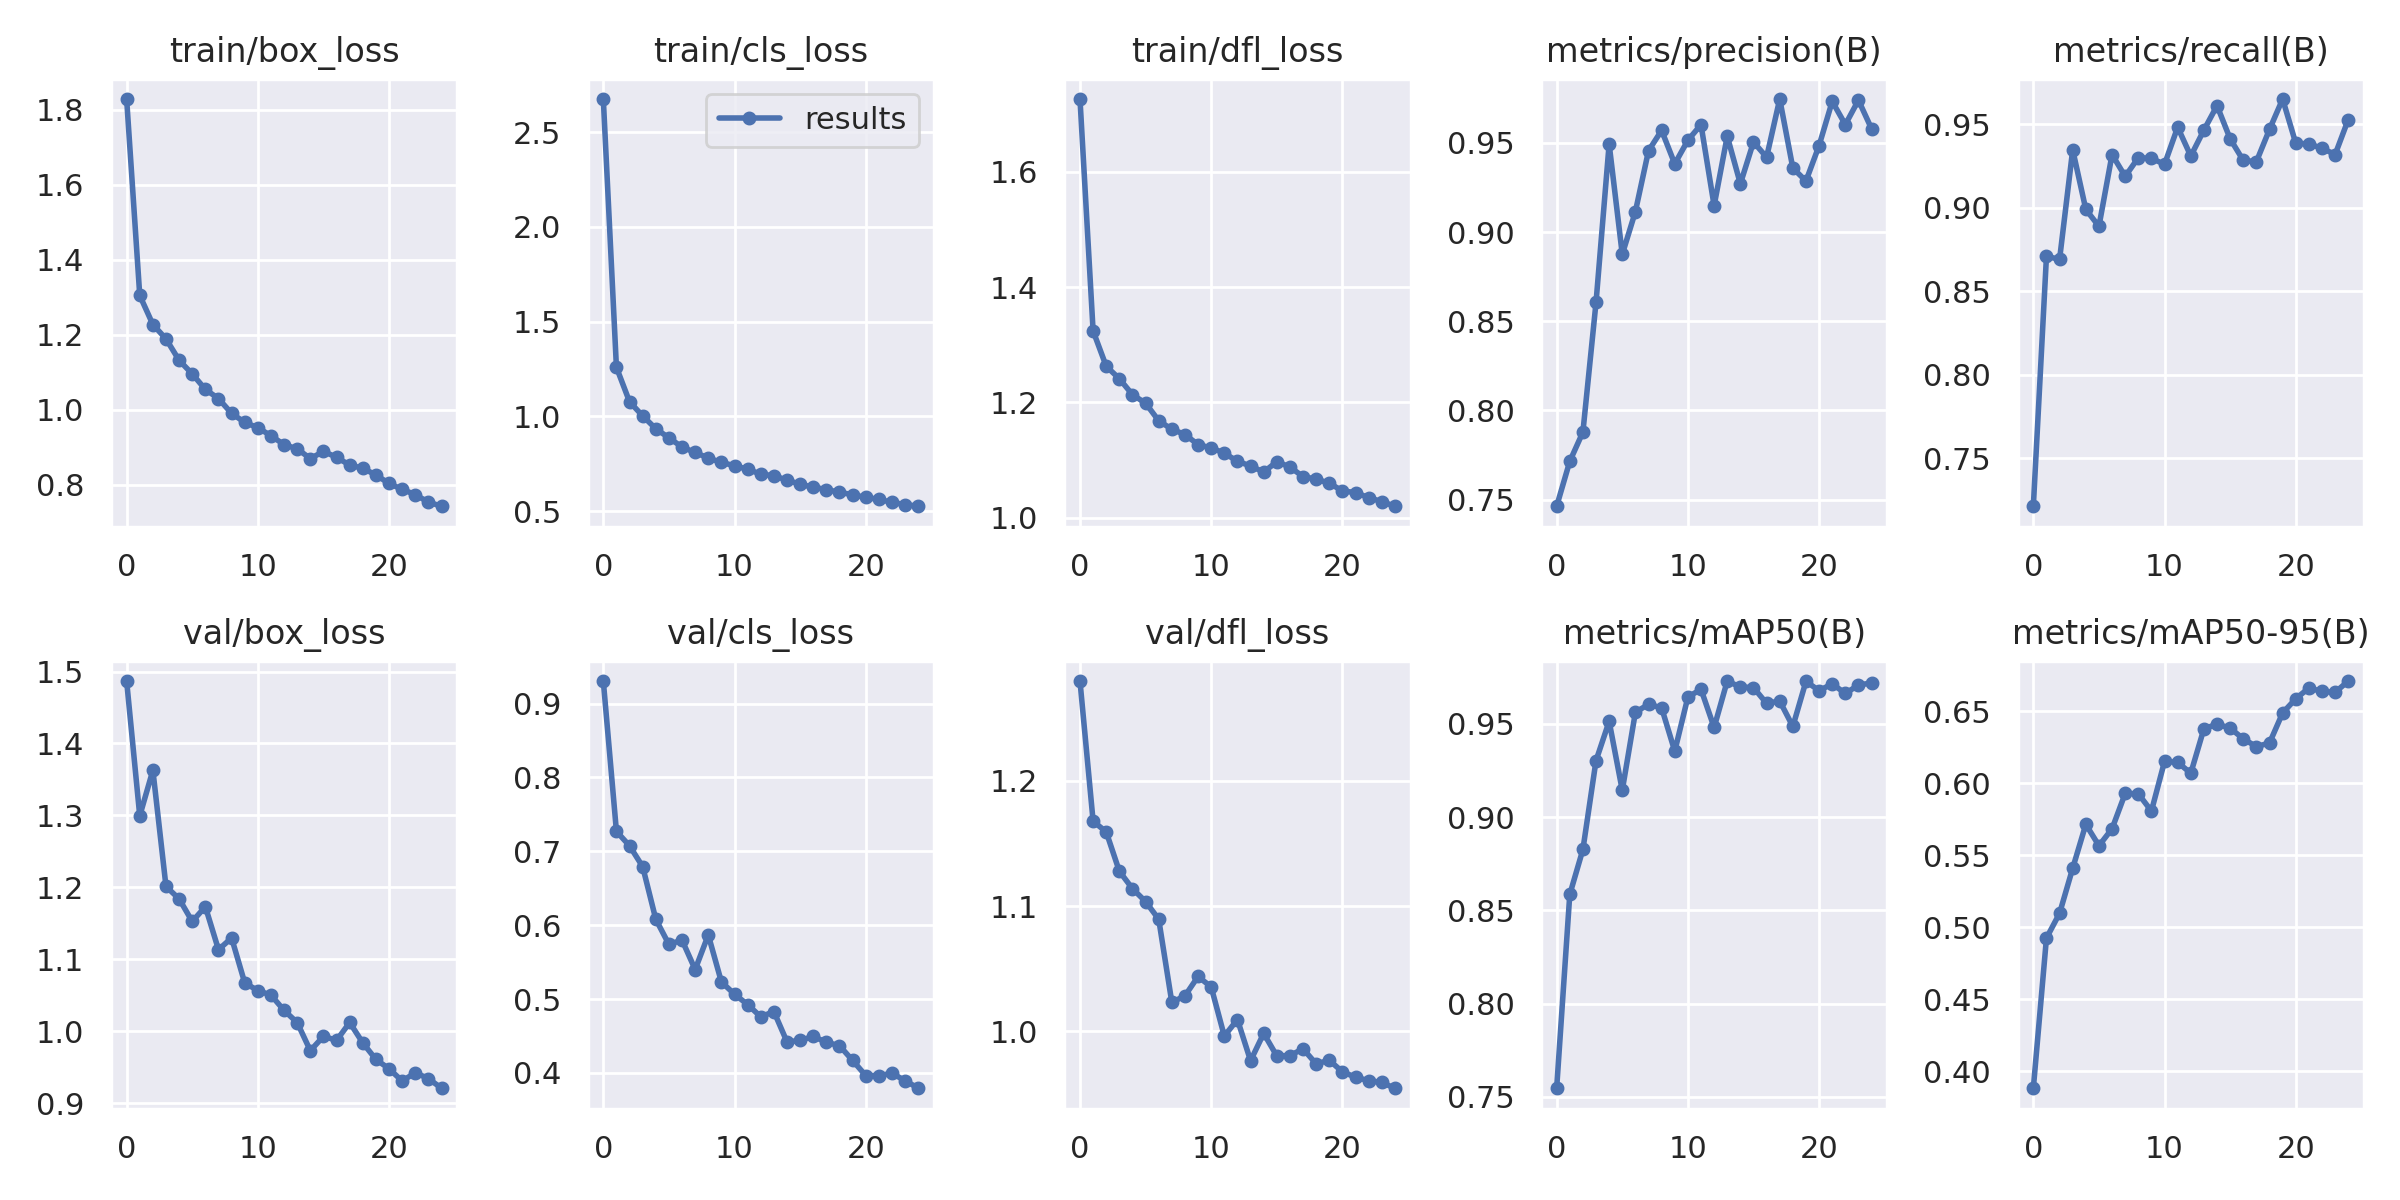

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=800)

/content/drive/MyDrive/yolo8-rail-road-crossing


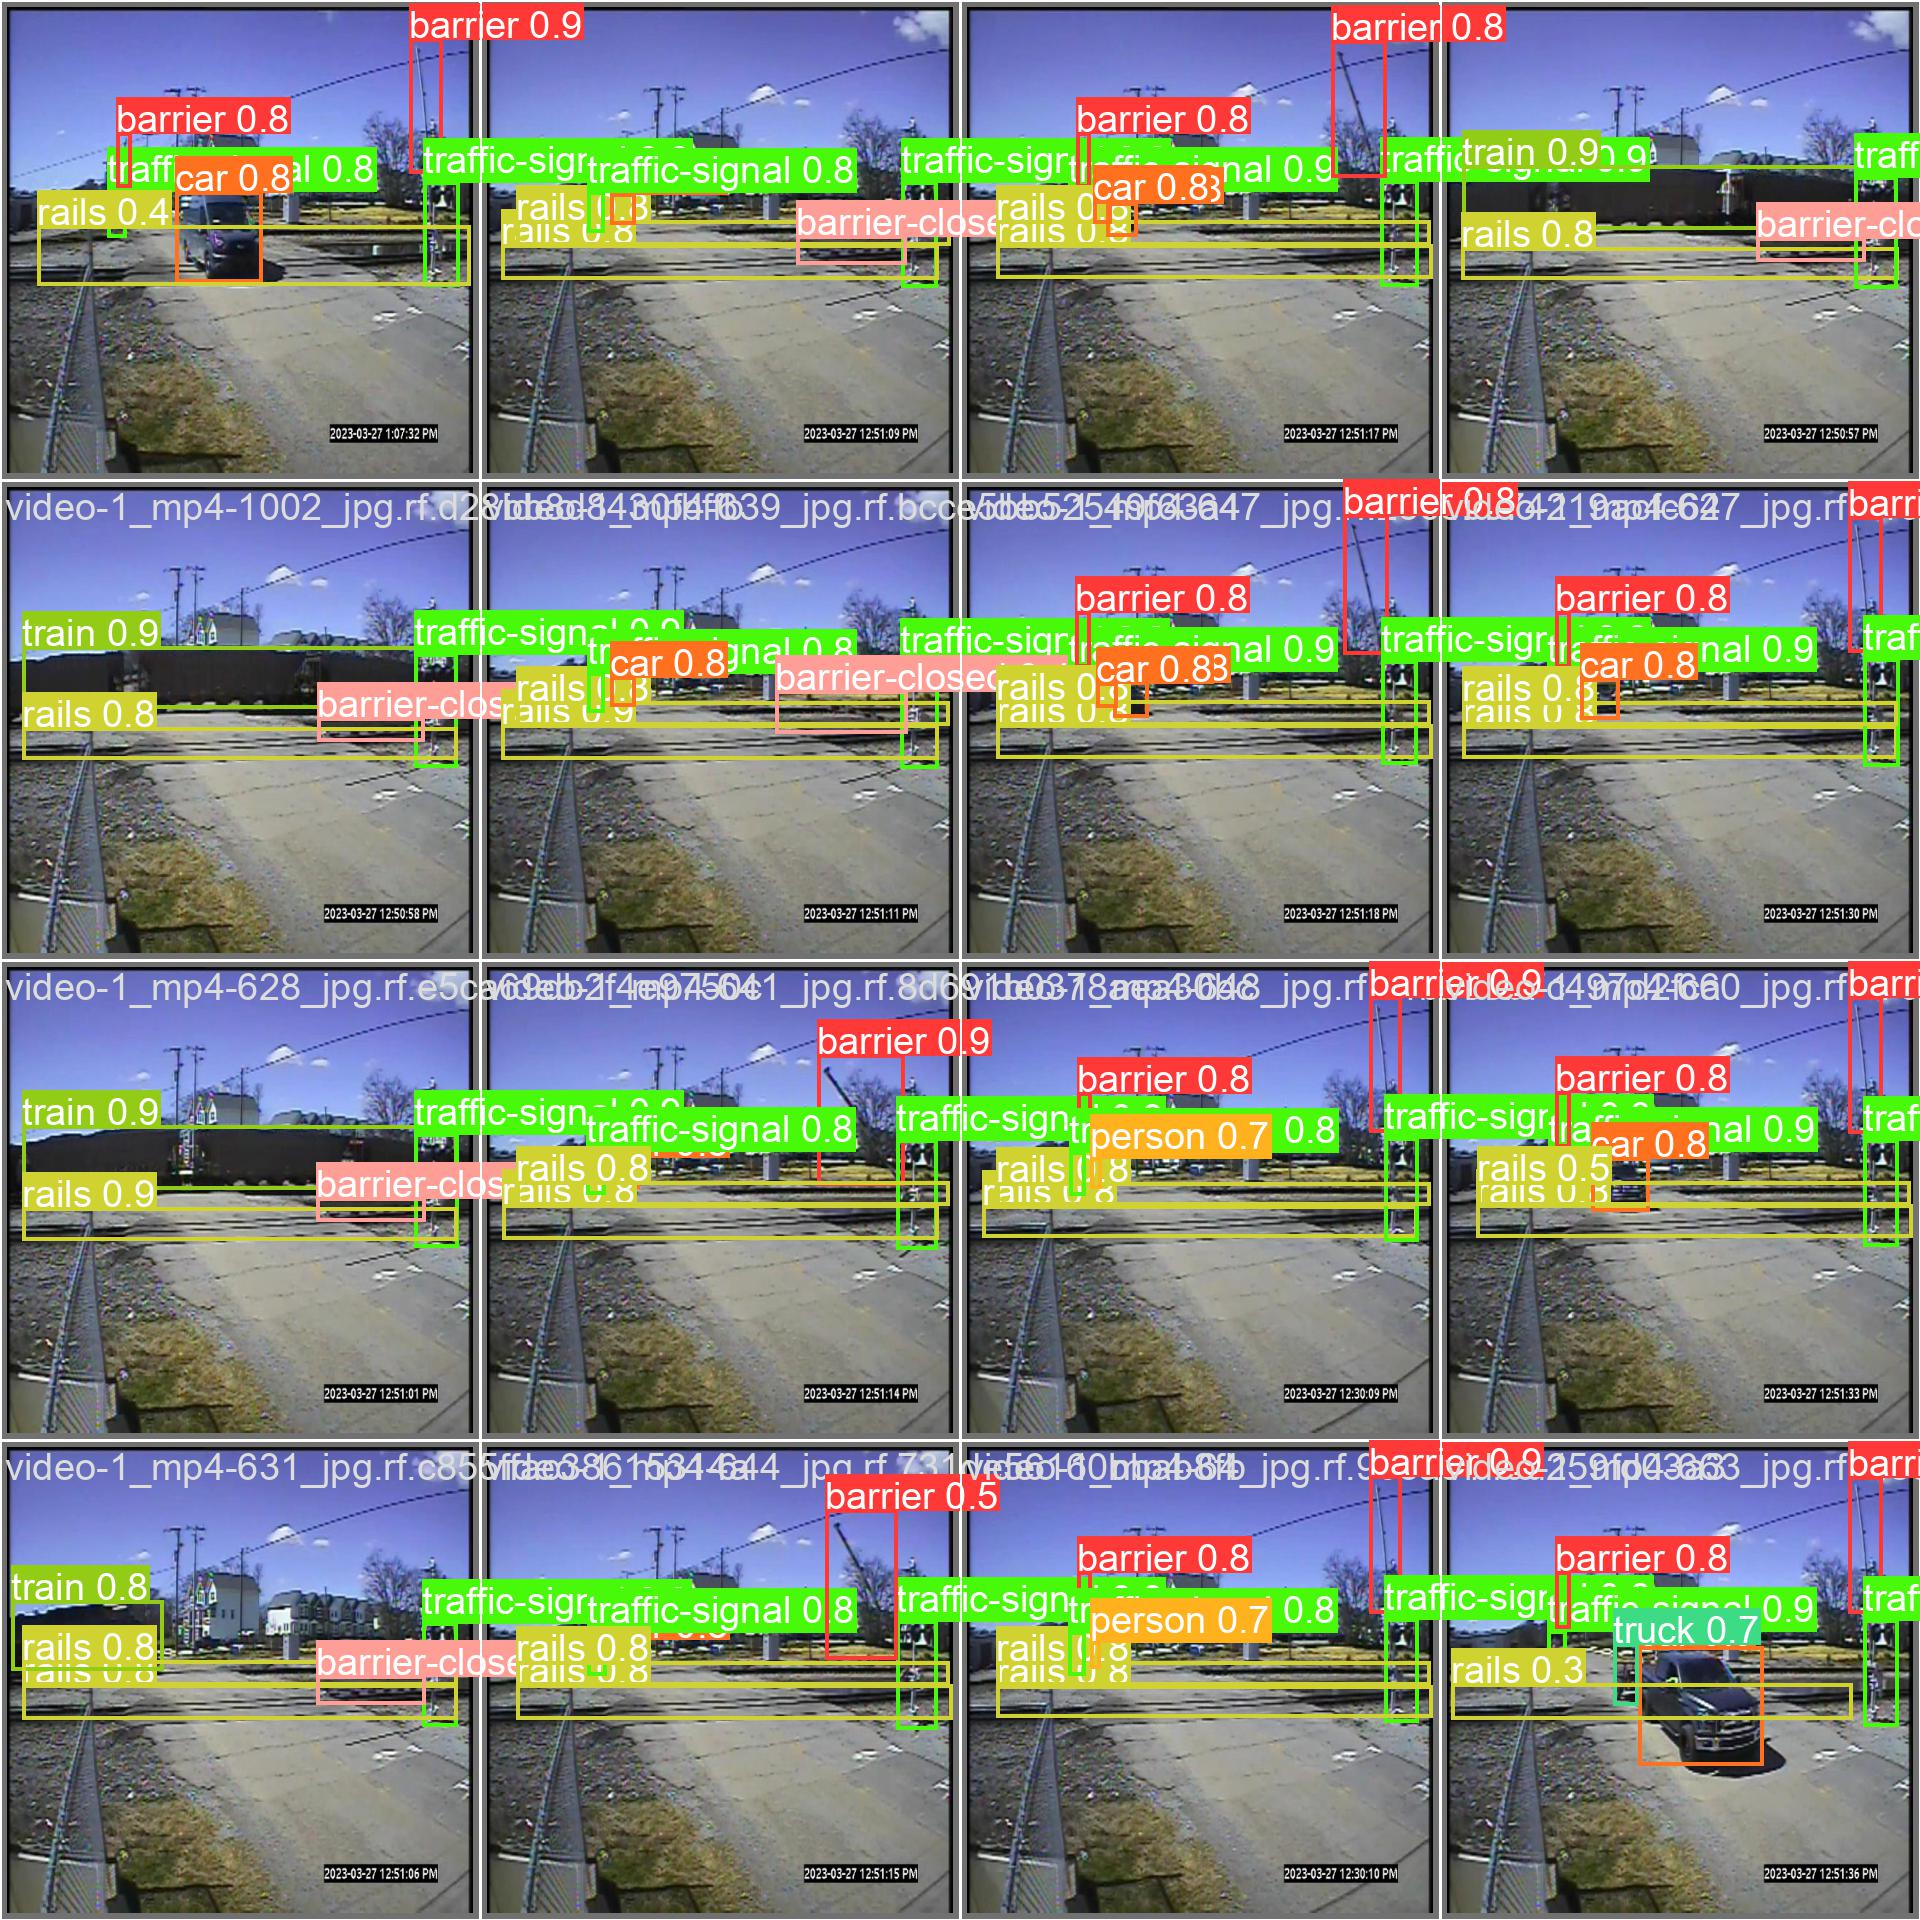

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/yolo8-rail-road-crossing
2023-06-06 03:16:04.156589: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 03:16:05.018574: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/yolo8-rail-road-crossing/datasets/rail-road-crossing-4/valid/labels.cache... 224 images, 0 backgrounds, 0 corrupt: 100% 224/224 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:14<00:00,  1.03s/it]
                   all        224       

*italicized text*## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/drive/MyDrive/yolo8-rail-road-crossing
2023-06-06 03:16:35.712269: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 03:16:36.611264: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
image 1/112 /content/drive/MyDrive/yolo8-rail-road-crossing/datasets/rail-road-crossing-4/test/images/video-1_mp4-1000_jpg.rf.faccbe251af811953b5374b8cf7b1bb8.jpg: 1024x1024 2 barriers, 1 car, 2 railss, 2 traffic-signals, 32.5ms
image 2/112 /content/drive/MyDrive/yolo8-rail-road-crossing/datasets/rail-road-crossing-4/test/images/video-1_mp4-1012_

## Take a look at few results on videos


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.5 source={HOME}/test-videos save=True

Streaming output truncated to the last 5000 lines.
video 4/4 (3909/8906) /content/drive/MyDrive/yolo8-rail-road-crossing/test-videos/video-1-short.mp4: 704x1024 2 barriers, 3 railss, 2 traffic-signals, 1 truck, 12.9ms
video 4/4 (3910/8906) /content/drive/MyDrive/yolo8-rail-road-crossing/test-videos/video-1-short.mp4: 704x1024 2 barriers, 3 railss, 2 traffic-signals, 1 truck, 12.7ms
video 4/4 (3911/8906) /content/drive/MyDrive/yolo8-rail-road-crossing/test-videos/video-1-short.mp4: 704x1024 2 barriers, 3 railss, 2 traffic-signals, 1 truck, 13.7ms
video 4/4 (3912/8906) /content/drive/MyDrive/yolo8-rail-road-crossing/test-videos/video-1-short.mp4: 704x1024 2 barriers, 3 railss, 2 traffic-signals, 1 truck, 13.4ms
video 4/4 (3913/8906) /content/drive/MyDrive/yolo8-rail-road-crossing/test-videos/video-1-short.mp4: 704x1024 2 barriers, 3 railss, 2 traffic-signals, 1 truck, 12.6ms
video 4/4 (3914/8906) /content/drive/MyDrive/yolo8-rail-road-crossing/test-videos/video-1-short.mp4: 704x1024 2 ba